In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import sys


import math  
from math import comb
from matplotlib import cm
import sklearn.metrics as metrics
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import argparse
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings(action='ignore')
import seaborn as sns

import os
from scipy import stats
from scipy.spatial import distance

M = total # of universe dataset
k = # of selected dataset
a = gap of feature importance between two targeted features

In [2]:
def combination(n,r):
    n = np.int(n)
    r = np.int(r)
    return comb(n,r)

In [3]:
M = 1000
N = 20
gap = 0.05

# k = 1000
# r = 50

In [4]:
def prob_diff(k,r,gap):
#     R = r/N
    R = 1
    denominator = 0
    for d in range(2,int(k)):
        temp = combination(M-M*gap/R,k-d)*combination(M*gap/R,d)
        temp = temp-temp*(np.power(3/4,d)*2-np.power(1/2,d))
        denominator += temp


    prob = denominator/combination(M,k)
    return prob

In [5]:
grid_k = np.zeros((10,10))
grid_r = np.zeros((10,10))
grid_p = np.zeros((10,10))


for i in range(10):
    for j in range(10):
        grid_k[i,j] = (i+1)*M/10
#         grid_r[i,j] = (j+1)*N/10
        grid_r[i,j] = (j+1)*0.01
        grid_p[i,j] = prob_diff(grid_k[i,j],1,grid_r[i,j])

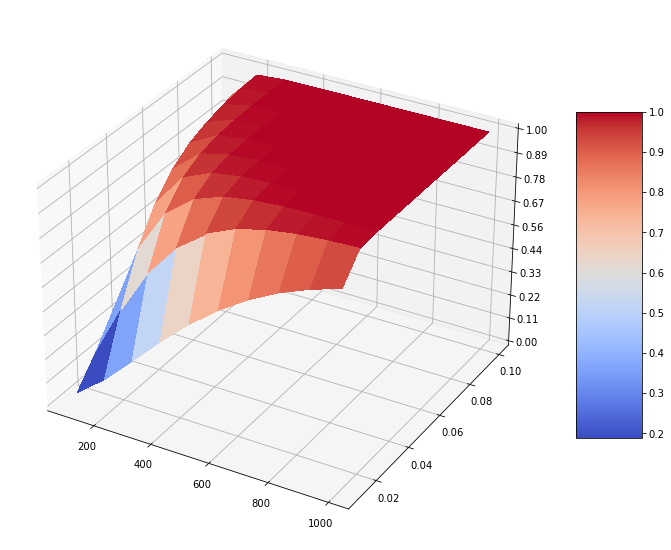

In [112]:

fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(grid_k, grid_r, grid_p, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 1.00)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()